In [1]:
import math as m
import numpy as np

r = 0.08
T = 1.0
K = 101
S0 = 100
gamma = 20
eps = 10 ** (-8)
vol = gamma/S0

def approxi_val(delt_t, M):
    N = int(T/delt_t)
    drift = r * delt_t
    random = vol * m.sqrt(delt_t)
    Si = S0
    for i in np.arange(N):
        Si1 = Si + Si * (drift + np.random.randn(M) * random)
        Si1 = np.maximum(Si1, eps)
        Si = Si1
    payoff = np.maximum(K - Si1, 0)
    val = np.exp(-r * T) * (sum(payoff)/M)
    return val

In [2]:
sim = [1000,2000,4000,8000,16000,32000,64000,96000,128000,192000,256000]
def val_lst(delt_t):
    lst = []
    for i in np.arange(len(sim)):
        val = approxi_val(delt_t, sim[i])
        lst.append(val)
    return lst

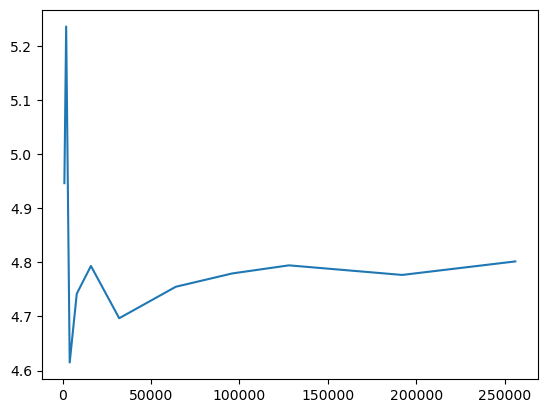

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as sts

t1 = 10/250
t2 = 2.5/250
t3 = 1/250
plt.plot(sim, val_lst(t1))
plt.show()

The value of the option fluctuates dramatically when the number of simulations is relatively small, however, it starts to grow to a relatively constant amount of around 4.8 when the number of simulations is relatively high, such as beyond 130000.

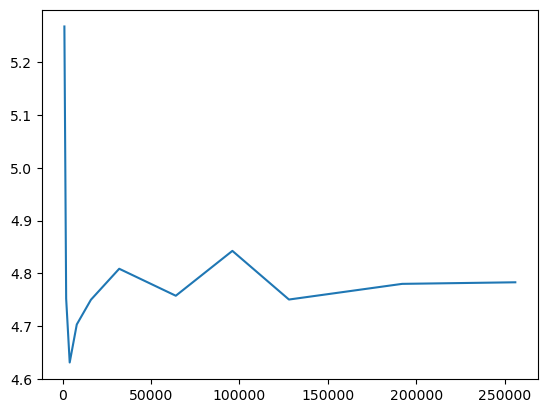

In [4]:
plt.plot(sim, val_lst(t2))
plt.show()

We see a similar trend in the plot. When the number of simulations is relatively small, the value of the option has dramatic fluctuations. But as the number of simulations gets larger, such as beyond 130000, the value of the option is showing a relatively constant amount of around 4.77.

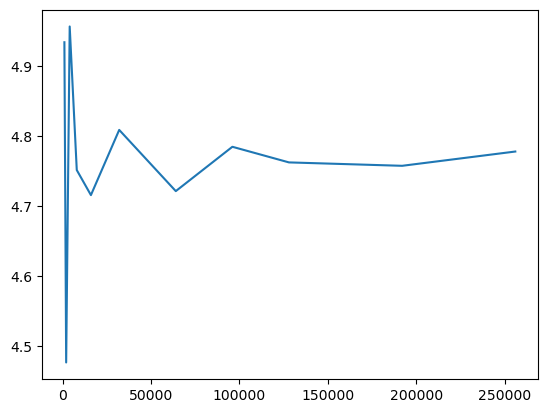

In [5]:
plt.plot(sim, val_lst(t3))
plt.show()

The value of the option fluctuates dramatically when the number of simulations is relatively small, however, it approaches a relatively constant amount when the number of simulations gets larger, such as beyond 100000. We note that the option value approaches a constant amount with less number of simulations than the above cases, which is due to smaller delt_t value and more accurate approximation. 

In [27]:
def put_val(M, delt_t):
    N = int(T/delt_t)
    drift = r * delt_t
    random = vol * m.sqrt(delt_t)
    Si = S0
    for i in np.arange(N):
        Si1 = Si + Si * (drift + np.random.randn(M) * random)
        Si1 = np.maximum(Si1, eps)
        Si = Si1
    payoff = np.maximum(K - Si1, 0)
    return payoff


In [28]:
# generating simple text table
print("M \t Estimated option value \t Lower bound \t\t Upper bound")

sim = [1000,2000,4000,8000,16000,32000,64000,96000,128000,192000,256000]
for i in range(len(sim)):
    val = approxi_val(t3, sim[i])
    s = put_val(sim[i], t3)
    crit = m.exp(-r * T) * s 
    lower = val - 1.96 * np.std(crit)/m.sqrt(sim[i])
    upper = val + 1.96 * np.std(crit)/m.sqrt(sim[i])
    print("%d \t\t %0.7f \t\t %0.7f \t\t %0.7f" % 
          (sim[i], val, lower, upper))
        

M 	 Estimated option value 	 Lower bound 		 Upper bound
1000 		 4.6663368 		 4.1747494 		 5.1579242
2000 		 4.4146825 		 4.0684417 		 4.7609234
4000 		 4.7991098 		 4.5565139 		 5.0417058
8000 		 4.7498523 		 4.5750982 		 4.9246065
16000 		 4.9014757 		 4.7780339 		 5.0249175
32000 		 4.6764908 		 4.5892576 		 4.7637240
64000 		 4.8425682 		 4.7804013 		 4.9047352
96000 		 4.7538663 		 4.7032930 		 4.8044397
128000 		 4.7968933 		 4.7531683 		 4.8406183
192000 		 4.7752303 		 4.7393307 		 4.8111299
256000 		 4.7783113 		 4.7474518 		 4.8091708
